In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [18]:
train_path = 'C:/Users/EZUDDIN/Documents/dataset/train'
valid_path = 'C:/Users/EZUDDIN/Documents/dataset/val'
test_path = 'C:/Users/EZUDDIN/Documents/dataset/test'

In [20]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Capybara','Cat','dog'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Capybara','Cat','dog'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Capybara','Cat','dog'], batch_size = 10, shuffle=False)

Found 10000 images belonging to 3 classes.
Found 10000 images belonging to 3 classes.
Found 10000 images belonging to 3 classes.


In [22]:
assert train_batches.n == 10000
assert valid_batches.n == 10000
assert test_batches.n == 10000
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 3

In [24]:
imgs , labels = next(train_batches)

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

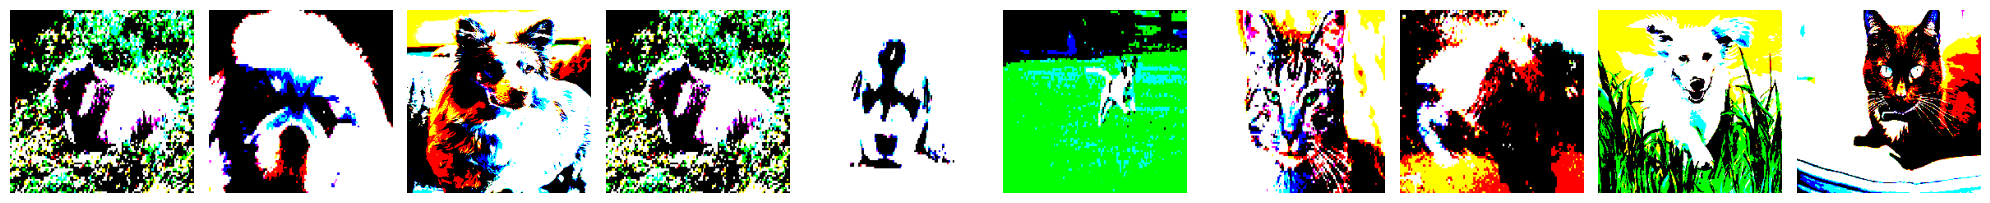

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [28]:
plotImages(imgs)
print(labels)

In [30]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

resnet_model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV3Large(
    input_shape=(180, 180, 3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    classes=3,
    pooling='avg',
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

for layer in pretrained_model.layers:
    layer.trainable=True

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

C:\Users\EZUDDIN\anaconda3\Lib\site-packages\keras\src\applications\mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [32]:
resnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 960)            │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       492,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,489,923 (13.31 MB)

 Trainable params: 3,465,523 (13.22 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [19]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50
history = resnet_model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=epochs
)

C:\Users\EZUDDIN\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "MobileNetV3Large" is incompatible with the layer: expected shape=(None, 180, 180, 3), found shape=(None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_batches = train_datagen.flow_from_directory(
    'path_to_training_data',
    target_size=(180, 180),  # Resize images
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    'path_to_validation_data',
    target_size=(180, 180),  # Resize images
    batch_size=32,
    class_mode='categorical'
)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_training_data'

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_batches = train_datagen.flow_from_directory(
    'C:/Users/EZUDDIN/Documents/dataset/train',
    target_size=(180, 180),  # Resize images
    batch_size=32,
    class_mode='categorical'
)

valid_batches = valid_datagen.flow_from_directory(
    'C:/Users/EZUDDIN/Documents/dataset/val',
    target_size=(180, 180),  # Resize images
    batch_size=32,
    class_mode='categorical'
)


Found 10000 images belonging to 3 classes.
Found 10000 images belonging to 3 classes.


In [46]:
from tensorflow.keras.applications import MobileNetV3Large

base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


In [27]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50
history = resnet_model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=epochs
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.9686 - loss: 0.0938 - val_accuracy: 0.2823 - val_loss: 4.2526
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 602s 2s/step - accuracy: 0.9920 - loss: 0.0341 - val_accuracy: 0.3000 - val_loss: 2.3084
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 1.0000 - loss: 6.4731e-05 - val_accuracy: 0.3068 - val_loss: 2.0535
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 1.0000 - loss: 9.4410e-06 - val_accuracy: 0.2174 - val_loss: 2.1732
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.2000 - val_loss: 410.6326
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.9843 - loss: 0.0989 - val_accuracy: 0.2000 - val_loss: 55.5702
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - accuracy: 0.9998 - loss: 5.0318e-04 - val_accuracy: 0.2000 - val_loss: 66.2354
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - accuracy: 1.0000 - loss: 3

In [54]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

In [ ]:
predictions = resnet_model.predict(x=test_batches, verbose=0)


In [ ]:
np.round(predictions)


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis = -1))
